In [242]:
# 对可能影响 生还率 的 因素 做分析
# 1、性别 2、年龄 3、票价 4、社会等级 5、登陆地点


In [292]:
# 导入数据
import pandas as pd

filename = 'F:\\Udacity\\p4\\project\\titanic_data.csv'
titanic_data_df = pd.read_csv(filename)

In [269]:
titanic_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
titanic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [246]:
titanic_data_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [247]:
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


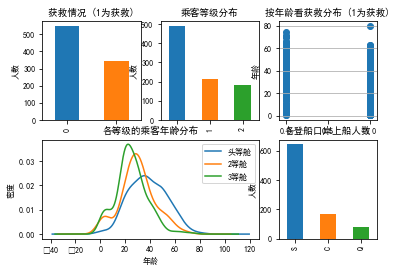

In [248]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
plt.rc('font', family='SimHei', size=8) # Jupyter Notebook 作图显示中文


plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
titanic_data_df.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数") 


plt.subplot2grid((2,3),(0,1))
titanic_data_df.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(titanic_data_df.Survived, titanic_data_df.Age) # 散点图
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
titanic_data_df.Age[titanic_data_df.Pclass == 1].plot(kind='kde')   
titanic_data_df.Age[titanic_data_df.Pclass == 2].plot(kind='kde')
titanic_data_df.Age[titanic_data_df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
titanic_data_df.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

In [274]:
# inplace = True 在原数据集上原地修改，原数据集变为清除缺失值之后的数据集
titanic_data_df.dropna(subset = ['Age', 'Embarked'], inplace = True)

In [250]:
titanic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [251]:
import matplotlib.pyplot as plt
#判断单一元素对幸存率的影响
def survive_with_one_factor(survived, factor):
    
    print '幸存人数: ', titanic_data_df.groupby(factor).sum()[survived]
    print ''
    print '总人数: ', titanic_data_df.groupby(factor).count()[survived]
    print ''
    print '幸存率: ', titanic_data_df.groupby(factor).mean()[survived]
    
    survived_rate = titanic_data_df.groupby(factor).mean()[survived]
    # 直方图**的生还率
    survived_rate.plot(kind='bar')
    plt.title(factor + 'Survival rate')
    plt.xlabel(factor)
    plt.ylabel(survived)
    plt.show()

幸存人数:  Sex
female    195
male       93
Name: Survived, dtype: int64

总人数:  Sex
female    259
male      453
Name: Survived, dtype: int64

幸存率:  Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


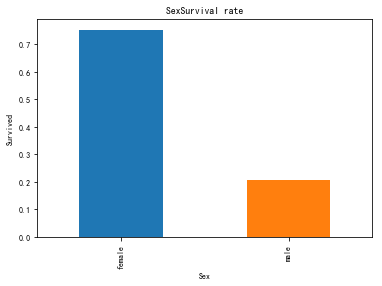

女性幸存率高


In [252]:
# 性别对幸存率的影响
survive_with_one_factor('Survived', 'Sex')
print '女性幸存率高'

幸存人数:  Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64

总人数:  Pclass
1    184
2    173
3    355
Name: Survived, dtype: int64

幸存率:  Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


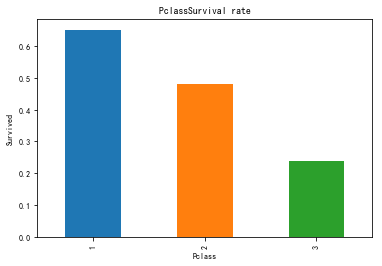

Pclass 为1 幸存率最高


In [253]:
# 社会等级 Pclass对幸存率的影响
survive_with_one_factor('Survived', 'Pclass')
print 'Pclass 为1 幸存率最高'

幸存人数:  SibSp
0    173
1     97
2     11
3      4
4      3
5      0
Name: Survived, dtype: int64

总人数:  SibSp
0    469
1    183
2     25
3     12
4     18
5      5
Name: Survived, dtype: int64

幸存率:  SibSp
0    0.368870
1    0.530055
2    0.440000
3    0.333333
4    0.166667
5    0.000000
Name: Survived, dtype: float64


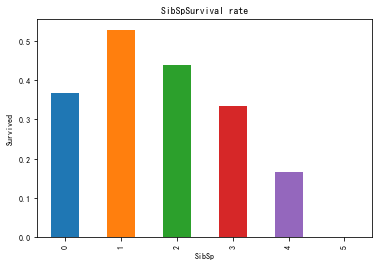

有1个SibSp幸存率最高


In [254]:
# 判断亲戚和配偶在船数量对存活率的影响
survive_with_one_factor('Survived', 'SibSp')
print '有1个SibSp幸存率最高'

幸存人数:  Parch
0    184
1     61
2     39
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

总人数:  Parch
0    519
1    110
2     68
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

幸存率:  Parch
0    0.354528
1    0.554545
2    0.573529
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


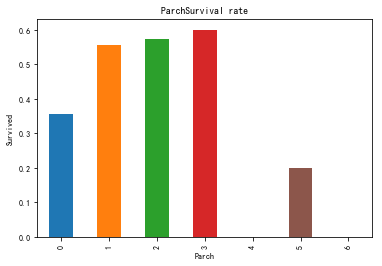

有1-3位父母孩子 幸存率最高


In [255]:
# 判断父母孩子的在船数量对存活率的影响
survive_with_one_factor('Survived', 'Parch')
print '有1-3位父母孩子 幸存率最高'

幸存人数:  Embarked
C     79
Q      8
S    201
Name: Survived, dtype: int64

总人数:  Embarked
C    130
Q     28
S    554
Name: Survived, dtype: int64

幸存率:  Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


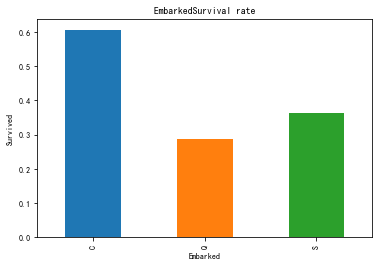

从C港口登陆幸存率最高


In [256]:
survive_with_one_factor('Survived', 'Embarked')
print '从C港口登陆幸存率最高'

In [265]:
# 判断区间元素对存活率的影响
import numpy as np
def survive_with_section_factor(survived, factor, bins):
    # 对年龄进行分组，每10岁为一组
    #bins=np.arange(0,90,10)
    # 对区间进行切割
    titanic_data_df[factor] = pd.cut(titanic_data_df[factor], bins)
    print '幸存人数: ', titanic_data_df.groupby(factor).sum()[survived]
    print ''
    print '总人数: ', titanic_data_df.groupby(factor).count()[survived]
    print ''
    print '幸存率: ', titanic_data_df.groupby(factor).mean()[survived]
    
    survived_rate = titanic_data_df.groupby(factor).mean()[survived]
    # 直方图**的生还率
    survived_rate.plot(kind='bar')
    plt.title(factor + 'Survival rate')
    plt.xlabel(factor)
    plt.ylabel(survived)
    plt.show() 

幸存人数:  Age
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    68
(40, 50]    33
(50, 60]    17
(60, 70]     3
(70, 80]     1
Name: Survived, dtype: int64

总人数:  Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    154
(40, 50]     86
(50, 60]     42
(60, 70]     16
(70, 80]      5
Name: Survived, dtype: int64

幸存率:  Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.441558
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.187500
(70, 80]    0.200000
Name: Survived, dtype: float64


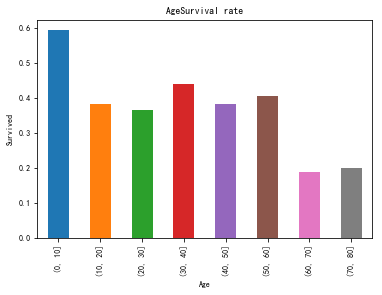

10岁以下儿童幸存率最高


In [271]:
# 判断年龄对幸存率的影响
survive_with_section_factor('Survived', 'Age', np.arange(0,90,10))
print '10岁以下儿童幸存率最高'

幸存人数:  Fare
(0, 30]       167.0
(30, 60]       46.0
(60, 90]       34.0
(90, 120]      14.0
(120, 150]      6.0
(150, 180]      6.0
(180, 210]      NaN
(210, 240]      6.0
(240, 270]      5.0
Name: Survived, dtype: float64

总人数:  Fare
(0, 30]       504
(30, 60]       96
(60, 90]       53
(90, 120]      18
(120, 150]      7
(150, 180]      9
(180, 210]      0
(210, 240]      7
(240, 270]      8
Name: Survived, dtype: int64

幸存率:  Fare
(0, 30]       0.331349
(30, 60]      0.479167
(60, 90]      0.641509
(90, 120]     0.777778
(120, 150]    0.857143
(150, 180]    0.666667
(180, 210]         NaN
(210, 240]    0.857143
(240, 270]    0.625000
Name: Survived, dtype: float64


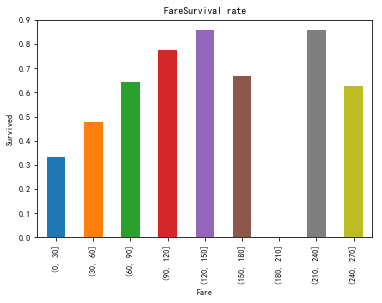

In [275]:
# 判断消费能力Fare对存活率的影响
survive_with_section_factor('Survived', 'Fare', np.arange(0,300,30))


In [276]:
print '票价高，幸存率高'

票价高，幸存率高


In [284]:
# 判断双元素对存活率的影响
def double_factor(factor1, factor2, survived):

    print '幸存人数: ', titanic_data_df.groupby([factor1, factor2]).sum()[survived]
    print ''
    print '总人数: ', titanic_data_df.groupby([factor1, factor2]).count()[survived]
    print ''
    print '幸存率: ', titanic_data_df.groupby([factor1, factor2]).mean()[survived]
    
    survived_rate = titanic_data_df.groupby([factor1, factor2]).mean()[survived]
    # 直方图**的生还率
    survived_rate.unstack().plot(kind='bar') # 把柱状图 拼接到一起
    plt.title(factor1 + " + " + factor2 + " " + 'Survival rate')
    plt.xlabel(factor1 + " + " + factor2)
    plt.ylabel(survived)
    plt.show()

幸存人数:  Pclass  Sex   
1       female    80
        male      40
2       female    68
        male      15
3       female    47
        male      38
Name: Survived, dtype: int64

总人数:  Pclass  Sex   
1       female     83
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Survived, dtype: int64

幸存率:  Pclass  Sex   
1       female    0.963855
        male      0.396040
2       female    0.918919
        male      0.151515
3       female    0.460784
        male      0.150198
Name: Survived, dtype: float64


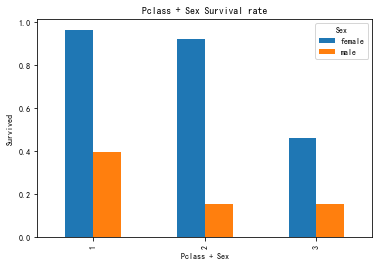

In [285]:
# 判断舱位和性别对幸存率的综合影响
double_factor('Pclass', 'Sex', 'Survived')

In [281]:
print '对于男女性别，舱位都是等级越高,存活率越高'

对于男女性别，舱位都是等级越高,存活率越高


In [303]:
#　皮尔逊积矩相关系数　计算相关性　dataframe.列1.corr(dataframe.列2)
#　票价和幸存率正相关
titanic_data_df.Fare.corr(titanic_data_df.Survived)

0.25730652238496232